In [1]:
import sys

sys.path.append("..")
from scipy.constants import eV
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import src.fem_schrodinger_1d as fem_schrodinger_1d
import importlib

importlib.reload(fem_schrodinger_1d)
from src.fem_schrodinger_1d import *

In [2]:
m_e = 9.10938356e-31
omega = 1e14
xs = np.linspace(-1e-8, 1e-8, 100)
vs = 1 / 2 * m_e * omega**2 * xs**2

In [3]:
fem = FemSchrodinger(xs[-1] - xs[0], vs)

In [4]:
A = fem.assemble_matrix_A()
B = fem.assemble_matrix_B()

In [5]:
A_prime = A[1:-1, 1:-1]
B_prime = B[1:-1, 1:-1]

In [6]:
val, vec = eigsh(A_prime, 10, M=B_prime, which="LA", sigma=0)

Text(0.5, 0, 'x (nm)')

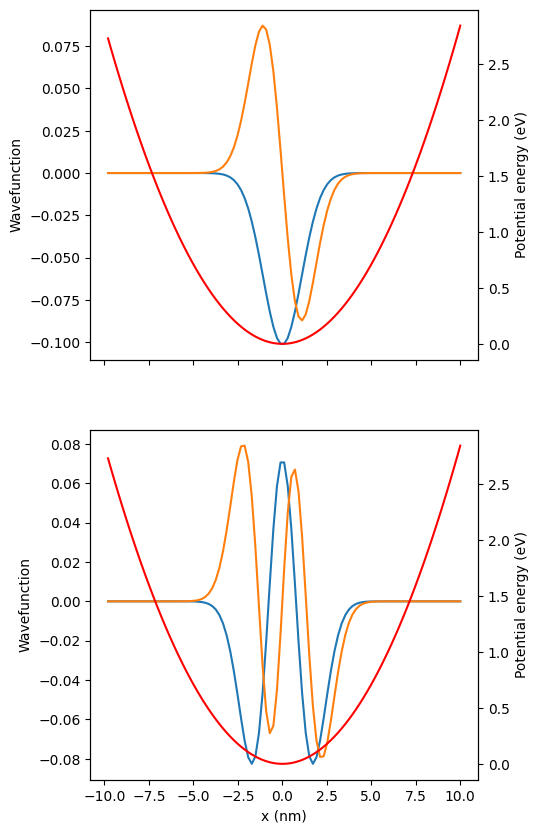

In [7]:
vec = vec / np.linalg.norm(vec)
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5, 10))
ax[0].plot(xs[1:] / 1e-9, vec[:, 0:2].real)
ax2 = ax[0].twinx()
ax2.plot(xs[1:] / 1e-9, vs[1:] / eV, color="red")
ax[1].plot(xs[1:] / 1e-9, vec[:, 2:4].real)
ax3 = ax[1].twinx()
ax3.plot(xs[1:] / 1e-9, vs[1:] / eV, color="red")
ax[0].set_ylabel("Wavefunction")
ax2.set_ylabel("Potential energy (eV)")
ax[1].set_ylabel("Wavefunction")
ax3.set_ylabel("Potential energy (eV)")
ax[1].set_xlabel("x (nm)")

In [8]:
val / eV

array([0.03350875, 0.1002836 , 0.16734564, 0.23469296, 0.30232365,
       0.37023577, 0.43842738, 0.50689654, 0.57564129, 0.64465965])

In [9]:
hbar = 1.0545718e-34
for n in range(10):
    print(f"energy:{hbar * omega * (n + 1 / 2) / eV} eV")

energy:0.032910597296852105 eV
energy:0.09873179189055632 eV
energy:0.16455298648426053 eV
energy:0.23037418107796473 eV
energy:0.2961953756716689 eV
energy:0.36201657026537315 eV
energy:0.42783776485907743 eV
energy:0.49365895945278154 eV
energy:0.5594801540464859 eV
energy:0.6253013486401899 eV
